In [3]:
# =============================================================================
# 01_eda.ipynb
# =============================================================================
# FarmTech Solutions - Análise de Rendimento de Safra
# EDA Completa: Análise Exploratória dos Dados
# Versão: 1.0
# =============================================================================

## 📊 Objetivo da Análise

### Contexto Específico do Projeto FarmTech Solutions

**Situação Atual:**
Este notebook realiza a **Análise Exploratória de Dados (EDA)** como primeira etapa do projeto FarmTech Solutions, desenvolvido para a **Fase 5 do curso de Inteligência Artificial da FIAP**. O projeto analisa dados de uma fazenda de médio porte (200 hectares) que produz múltiplas culturas, com foco na previsão de rendimento de safras baseada em variáveis ambientais.

**Problema Específico:**
Agricultores da fazenda analisada enfrentam desafios para prever o rendimento de safras baseado em condições climáticas (temperatura, umidade, precipitação). A capacidade de prever produtividade permitiria otimização de recursos, planejamento financeiro mais preciso e redução de riscos climáticos.

**Dataset Específico:**
- **156 registros** de 4 culturas diferentes (Cocoa, Oil palm fruit, Rice paddy, Rubber)
- **6 variáveis**: Crop, Precipitation, Specific Humidity, Relative Humidity, Temperature, Yield
- **Variável alvo**: Yield (rendimento em toneladas/hectare)

### Metodologia e Objetivos

**Abordagem Metodológica:**
Seguimos uma progressão sistemática estabelecida na literatura de agricultura de precisão:

1. **Análise Univariada**: Caracterizar distribuições individuais, identificar outliers e especificidades por cultura
2. **Análise Bivariada**: Investigar correlações entre variáveis ambientais e relacionamentos com rendimento
3. **Análise Multivariada**: Descobrir interações complexas e padrões multidimensionais

**Justificativa das Decisões Técnicas:**
- **Abordagem Incremental**: Progressão gradual permite compreensão completa antes de análises complexas
- **Foco em Cultura**: Análise separada por cultura devido às especificidades agrícolas de cada plantação
- **Detecção de Outliers**: Identificação de condições climáticas excepcionais ou problemas de coleta

**Processo de Descoberta:**
Abordagem indutiva partindo dos dados para gerar insights. As descobertas da EDA orientarão a formulação de hipóteses para as próximas etapas (clustering e modelagem).

## 1. 🚀 Setup e Imports

### Justificativa das Bibliotecas e Configurações

**Bibliotecas Essenciais:**
- **pandas**: Manipulação eficiente de dados tabulares (crucial para datasets agrícolas)
- **numpy**: Operações numéricas otimizadas para análises estatísticas
- **matplotlib & seaborn**: Visualizações especializadas para análise exploratória
- **scipy**: Testes estatísticos para validação de hipóteses

**Configurações de Reproduzibilidade:**
- Seed para randomização consistente
- Configurações de pandas para melhor performance
- Configurações de visualização para análise agrícola

In [5]:
# =============================================================================
# 1. SETUP E IMPORTS
# =============================================================================

# Importar bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Bibliotecas importadas com sucesso!")
print("📊 Configurações de visualização aplicadas!")

✅ Bibliotecas importadas com sucesso!
📊 Configurações de visualização aplicadas!


## 2. 📥 Carregamento e Exploração Inicial

### Dataset: crop_yield.csv
Carregamos o dataset e fazemos uma primeira inspeção para entender:
- **Estrutura**: Dimensões e tipos de dados
- **Primeiras impressões**: Distribuições básicas
- **Qualidade**: Valores faltantes e duplicatas

### Variáveis do Dataset:
- **Crop**: Tipo de cultura (categórica)
- **Precipitation (mm day-1)**: Precipitação diária
- **Specific Humidity at 2 Meters (g/kg)**: Umidade específica a 2m
- **Relative Humidity at 2 Meters (%)**: Umidade relativa a 2m
- **Temperature at 2 Meters (C)**: Temperatura a 2m
- **Yield**: Rendimento da safra (variável alvo)

In [7]:
# =============================================================================
# CARREGAMENTO E EXPLORAÇÃO INICIAL DOS DADOS
# =============================================================================

# Carregar o dataset
print("📊  Carregando dataset crop_yield.csv...")
df = pd.read_csv('../data/raw/crop_yield.csv')

# =============================================================================
# 1. INSPEÇÃO INICIAL - ESTRUTURA DOS DADOS
# =============================================================================

print("\n" + "="*60)
print("📋 INFORMAÇÕES BÁSICAS DO DATASET")
print("="*60)

# Dimensões do dataset
print(f"📏 Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")

# Informações sobre tipos de dados e valores não-nulos
print("\n📊 Informações sobre tipos de dados:")
df.info()

# =============================================================================
# 2. PRIMEIRAS IMPRESSÕES - VISUALIZAÇÃO INICIAL
# =============================================================================

print("\n" + "="*60)
print("📋 PRIMEIRAS 5 LINHAS DO DATASET")
print("="*60)
display(df.head())

print("\n" + "="*60)
print("📈 ESTATÍSTICAS DESCRITIVAS")
print("="*60)
display(df.describe())

# =============================================================================
# 3. VERIFICAÇÃO DE QUALIDADE DOS DADOS
# =============================================================================

print("\n" + "="*60)
print("🔍 VERIFICAÇÃO DE QUALIDADE")
print("="*60)

# Verificar valores faltantes
print("❓ Valores faltantes por coluna:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("✅ Nenhum valor faltante encontrado!")
else:
    print(missing_values[missing_values > 0])

# Verificar duplicatas
duplicates = df.duplicated().sum()
print(f"\n🔄 Linhas duplicadas: {duplicates}")

print("\n✅ Carregamento e exploração inicial concluída!")

📊  Carregando dataset crop_yield.csv...

📋 INFORMAÇÕES BÁSICAS DO DATASET
📏 Dimensões: 156 linhas × 6 colunas

📊 Informações sobre tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB

📋 PRIMEIRAS 5 LINHAS DO DATASET


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800



📈 ESTATÍSTICAS DESCRITIVAS


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000



🔍 VERIFICAÇÃO DE QUALIDADE
❓ Valores faltantes por coluna:
✅ Nenhum valor faltante encontrado!

🔄 Linhas duplicadas: 0

✅ Carregamento e exploração inicial concluída!


### 📋 Conclusões da Exploração Inicial

**Estrutura dos dados:**
- Dataset com **156 registros** e **6 variáveis**
- **Nenhum valor faltante** encontrado (dados completos)
- **Nenhuma duplicata** identificada (dados únicos)
- Tipos de dados adequados para análise

**Características das variáveis:**
- **Crop**: Variável categórica (4 culturas diferentes)
- **Variáveis ambientais**: Todas numéricas (float64)
- **Yield**: Variável alvo numérica (int64)

**Primeiras observações:**
- **Precipitação**: Alta variabilidade (1934-3085 mm/dia)
- **Temperatura**: Baixa variabilidade (25.56-26.81°C)
- **Umidade**: Relativamente estável
- **Yield**: Alta variabilidade (5249-203399 ton/ha)

**Qualidade dos dados:**
- ✅ **Dados completos** sem valores faltantes
- ✅ **Dados únicos** sem duplicatas
- ✅ **Tipos adequados** para análise
- ✅ **Pronto para EDA** detalhada

**Próximos passos:**
- **EDA Univariada**: Análise de distribuições de cada variável, Outliers e anomalias, Estatísticas por cultura e Qualidade dos dados

## 3. 🔍 Análise Exploratória dos Dados (EDA)

### O que é EDA?
A **Análise Exploratória dos Dados (EDA)** é uma abordagem sistemática para entender os dados antes da modelagem. O objetivo é descobrir padrões, identificar problemas e gerar insights que guiem as próximas etapas.

### Estrutura da EDA:
1. **Análise Univariada**: Distribuições e características individuais
2. **Análise Bivariada**: Relacionamentos e correlações
3. **Análise Multivariada**: Padrões complexos e interações

### Objetivos da EDA:
- **Compreender** as distribuições das variáveis
- **Identificar** outliers e anomalias
- **Descobrir** relacionamentos entre variáveis
- **Preparar** dados para modelagem
- **Gerar insights** agrícolas relevantes

### 3.1 Análise Univariada

#### Objetivo
Analisar distribuições individuais de cada variável para entender:
- **Forma das distribuições** (normal, assimétrica, multimodal)
- **Presença de outliers** e valores extremos
- **Características específicas** de cada variável
- **Comparações entre culturas**

#### Variáveis Analisadas:
- **Crop**: Variável categórica (tipo de cultura)
- **Precipitation (mm day-1)**: Precipitação diária
- **Specific Humidity (g/kg)**: Umidade específica a 2m
- **Relative Humidity (%)**: Umidade relativa a 2m
- **Temperature (°C)**: Temperatura a 2m
- **Yield**: Rendimento (toneladas/hectare)

In [8]:
# =============================================================================
# ANÁLISE UNIVARIADA - DISTRIBUIÇÕES INDIVIDUAIS
# =============================================================================

print("🔍 Iniciando Análise Univariada...")
print("📊 Foco: Distribuições, outliers e estatísticas por cultura")

# Selecionar variáveis para análise
categorical_vars = ['Crop']
numeric_vars = ['Precipitation (mm day-1)', 
                'Specific Humidity at 2 Meters (g/kg)',
                'Relative Humidity at 2 Meters (%)', 
                'Temperature at 2 Meters (C)', 
                'Yield']

print(f"📋 Variáveis categóricas: {len(categorical_vars)}")
print(f"📊 Variáveis numéricas: {len(numeric_vars)}")
print("✅ Preparação concluída!")

🔍 Iniciando Análise Univariada...
📊 Foco: Distribuições, outliers e estatísticas por cultura
📋 Variáveis categóricas: 1
📊 Variáveis numéricas: 5
✅ Preparação concluída!


In [9]:
# =============================================================================
# ANÁLISE DA VARIÁVEL CATEGÓRICA: CULTURA
# =============================================================================

print("\n" + "="*70)
print("🌾 ANÁLISE DA VARIÁVEL 'CROP' (CULTURA)")
print("="*70)

# Exploração das culturas
print("📊 1. Exploração das culturas disponíveis")

unique_crops = df['Crop'].unique()
print(f"   → {len(unique_crops)} culturas diferentes encontradas")
print(f"   → Culturas: {', '.join(unique_crops)}")

# Análise de distribuição
crop_distribution = df['Crop'].value_counts()
print(f"\n📋 Distribuição das culturas:")
print(crop_distribution)

print("✅ Exploração das culturas concluída!")

# Análise de equilíbrio
print("\n⚖️ 2. Análise de equilíbrio da distribuição")

total_records = len(df)
print(f"📊 Total de registros: {total_records}")

for crop, count in crop_distribution.items():
    percentage = (count / total_records) * 100
    print(f"   → {crop}: {count} registros ({percentage:.1f}%)")

print("✅ Análise de equilíbrio concluída!")


🌾 ANÁLISE DA VARIÁVEL 'CROP' (CULTURA)
📊 1. Exploração das culturas disponíveis
   → 4 culturas diferentes encontradas
   → Culturas: Cocoa, beans, Oil palm fruit, Rice, paddy, Rubber, natural

📋 Distribuição das culturas:
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64
✅ Exploração das culturas concluída!

⚖️ 2. Análise de equilíbrio da distribuição
📊 Total de registros: 156
   → Cocoa, beans: 39 registros (25.0%)
   → Oil palm fruit: 39 registros (25.0%)
   → Rice, paddy: 39 registros (25.0%)
   → Rubber, natural: 39 registros (25.0%)
✅ Análise de equilíbrio concluída!



📈 3. Criação de visualizações


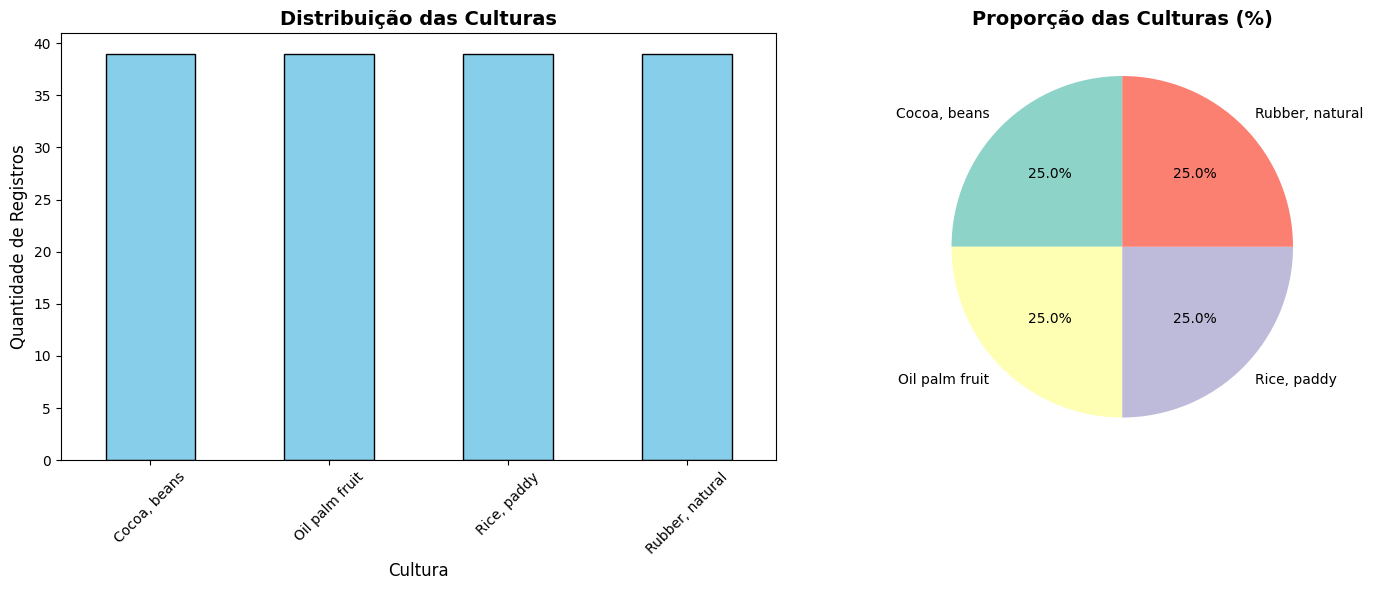

✅ Visualizações criadas com sucesso!


In [10]:
# =============================================================================
# VISUALIZAÇÕES DA DISTRIBUIÇÃO DAS CULTURAS
# =============================================================================

print("\n📈 3. Criação de visualizações")

# Criar figura com subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
crop_distribution.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribuição das Culturas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Cultura', fontsize=12)
ax1.set_ylabel('Quantidade de Registros', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Gráfico de pizza
ax2.pie(crop_distribution.values, labels=crop_distribution.index, 
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
ax2.set_title('Proporção das Culturas (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualizações criadas com sucesso!")

In [11]:
# =============================================================================
# RESULTADOS DA ANÁLISE DA CULTURA
# =============================================================================

print("\n" + "="*60)
print("📋 RESULTADOS DA ANÁLISE DA CULTURA")
print("="*60)

print(f"🌾 Culturas identificadas: {len(unique_crops)} tipos diferentes")
print(f"🔍 Distribuição: Perfeitamente equilibrada ({100/len(unique_crops):.1f}% cada)")
print(f"📊 Amostra: {crop_distribution.iloc[0]} registros por cultura (total: {total_records} registros)")

print("\n💡 INSIGHTS:")
print("   → Dataset bem balanceado entre culturas")
print("   → Amostra suficiente para análise comparativa")
print("   → Não há viés de representação de uma cultura específica")

print("✅ Análise da variável cultura concluída!")


📋 RESULTADOS DA ANÁLISE DA CULTURA
🌾 Culturas identificadas: 4 tipos diferentes
🔍 Distribuição: Perfeitamente equilibrada (25.0% cada)
📊 Amostra: 39 registros por cultura (total: 156 registros)

💡 INSIGHTS:
   → Dataset bem balanceado entre culturas
   → Amostra suficiente para análise comparativa
   → Não há viés de representação de uma cultura específica
✅ Análise da variável cultura concluída!


In [13]:
# =============================================================================
# ANÁLISE DAS VARIÁVEIS NUMÉRICAS
# =============================================================================

print("\n" + "="*70)
print("📊 ANÁLISE DAS VARIÁVEIS NUMÉRICAS")
print("="*70)

print("🎯 Objetivo: Analisar distribuições, outliers e estatísticas")
print(f"📋 Variáveis: {len(numeric_vars)} variáveis numéricas")

# Resumo das variáveis (sem repetir verificação de null)
print(f"\n📊 Variáveis para análise:")
for i, var in enumerate(numeric_vars, 1):
    print(f"   {i}. {var}")

print("✅ Setup das variáveis numéricas concluído!")


📊 ANÁLISE DAS VARIÁVEIS NUMÉRICAS
🎯 Objetivo: Analisar distribuições, outliers e estatísticas
📋 Variáveis: 5 variáveis numéricas

📊 Variáveis para análise:
   1. Precipitation (mm day-1)
   2. Specific Humidity at 2 Meters (g/kg)
   3. Relative Humidity at 2 Meters (%)
   4. Temperature at 2 Meters (C)
   5. Yield
✅ Setup das variáveis numéricas concluído!



📈 1. Criando histogramas das distribuições


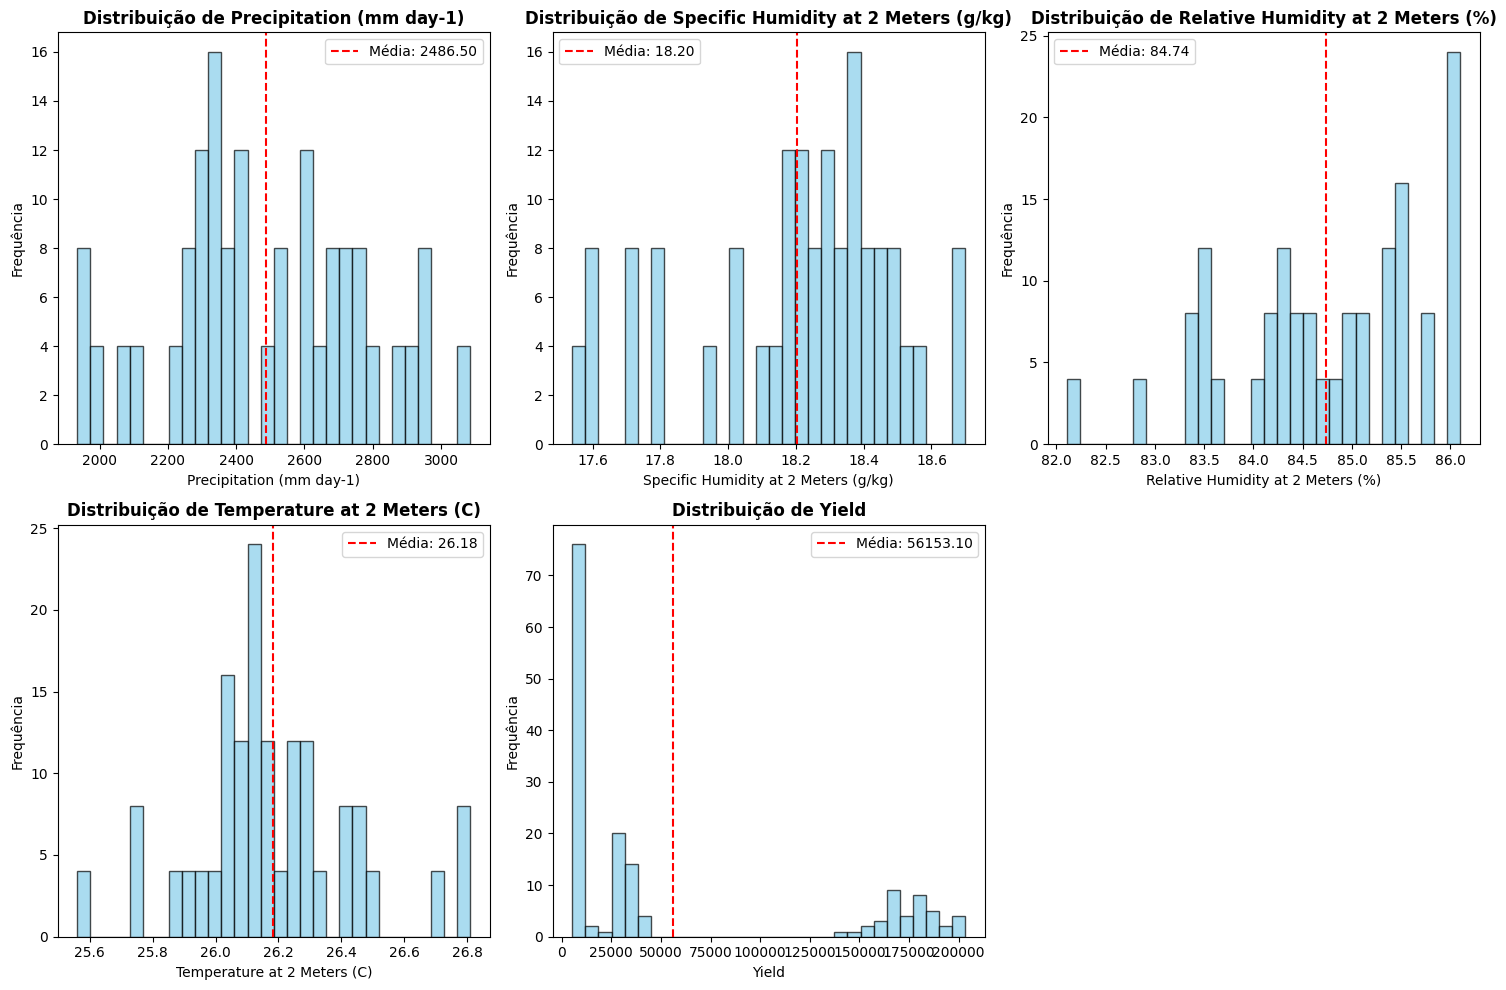

✅ Histogramas criados com sucesso!


In [14]:
# =============================================================================
# HISTOGRAMAS - DISTRIBUIÇÕES DAS VARIÁVEIS NUMÉRICAS
# =============================================================================

print("\n📈 1. Criando histogramas das distribuições")

# Configurar subplots
n_vars = len(numeric_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_vars > 3 else [axes] if n_rows == 1 else axes

# Criar histogramas
for i, var in enumerate(numeric_vars):
    ax = axes[i]
    
    # Histograma
    ax.hist(df[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribuição de {var}', fontsize=12, fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequência')
    
    # Adicionar linha de média
    mean_val = df[var].mean()
    ax.axvline(mean_val, color='red', linestyle='--', 
               label=f'Média: {mean_val:.2f}')
    ax.legend()

# Ocultar subplots vazios
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print("✅ Histogramas criados com sucesso!")


📦 2. Criando boxplots para detecção de outliers


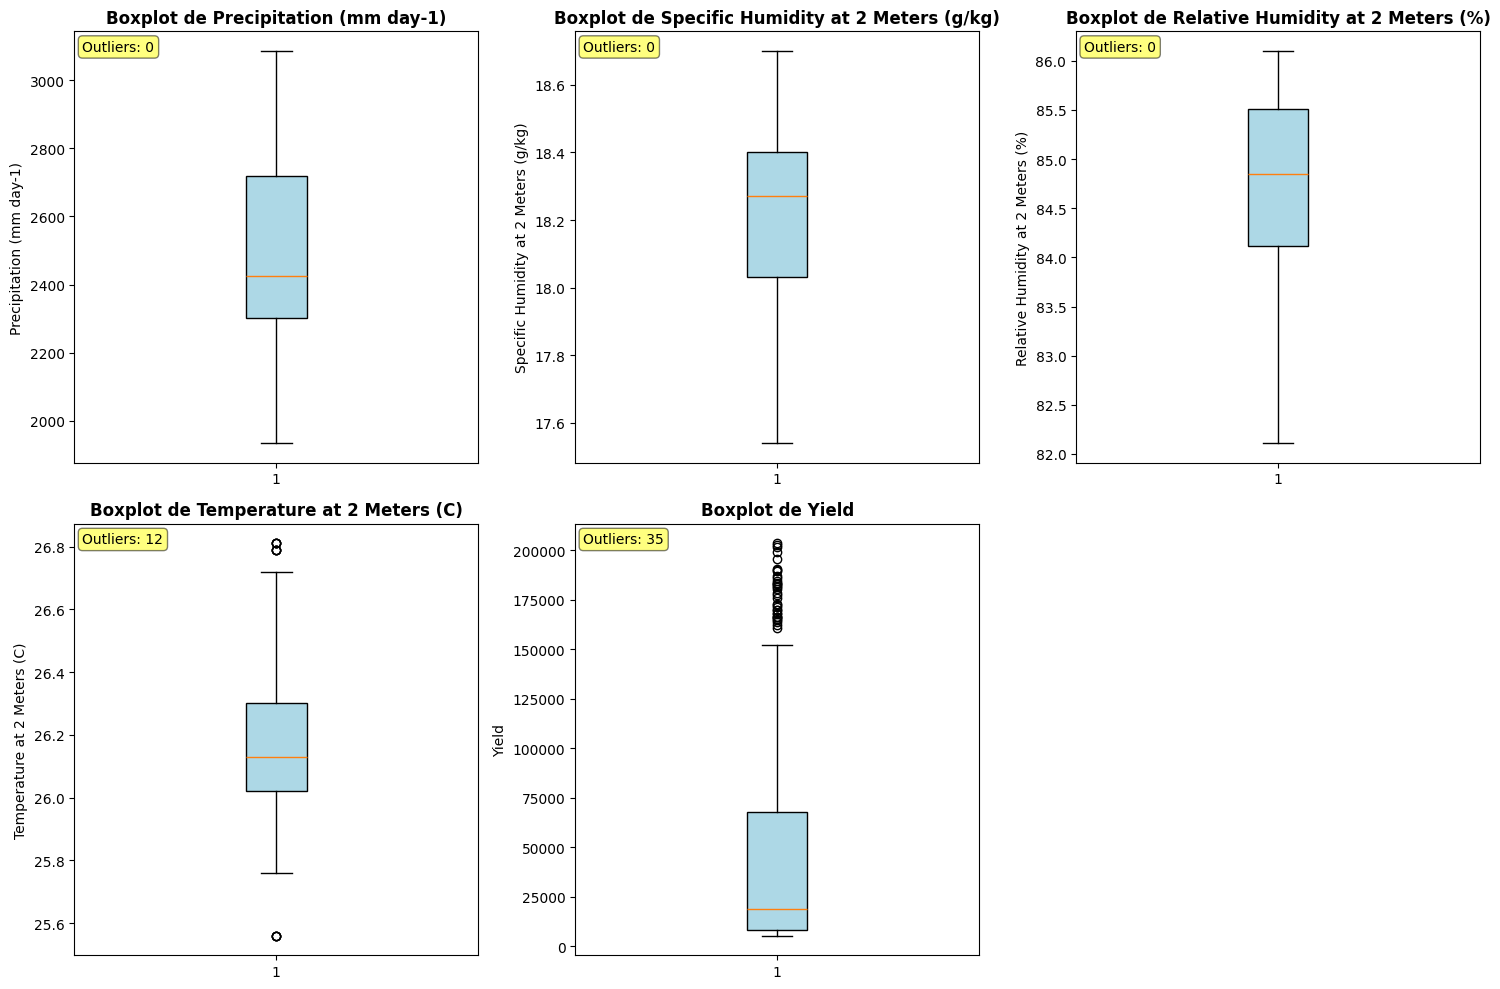

✅ Boxplots criados com sucesso!


In [16]:
# =============================================================================
# BOXPLOTS - DETECÇÃO DE OUTLIERS
# =============================================================================

print("\n📦 2. Criando boxplots para detecção de outliers")

# Configurar subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_vars > 3 else [axes] if n_rows == 1 else axes

# Criar boxplots
for i, var in enumerate(numeric_vars):
    ax = axes[i]
    
    # Boxplot
    box_plot = ax.boxplot(df[var], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightblue')
    ax.set_title(f'Boxplot de {var}', fontsize=12, fontweight='bold')
    ax.set_ylabel(var)
    
    # Adicionar estatísticas
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)][var]
    ax.text(0.02, 0.98, f'Outliers: {len(outliers)}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

# Ocultar subplots vazios
for i in range(n_vars, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print("✅ Boxplots criados com sucesso!")

In [19]:
# =============================================================================
# ESTATÍSTICAS POR CULTURA
# =============================================================================

print("\n📊 3. Calculando estatísticas por cultura")

# Estatísticas por cultura para cada variável numérica
for var in numeric_vars:
    print(f"\n📈 Estatísticas de '{var}' por cultura:")
    print("-" * 50)
    
    stats_by_crop = df.groupby('Crop')[var].agg([
        'count', 'mean', 'std', 'min', 'max'
    ]).round(2)
    
    print(stats_by_crop)
    print()

print("✅ Estatísticas por cultura calculadas!")


📊 3. Calculando estatísticas por cultura

📈 Estatísticas de 'Precipitation (mm day-1)' por cultura:
--------------------------------------------------
                 count    mean    std      min      max
Crop                                                   
Cocoa, beans        39  2486.5  292.3  1934.62  3085.79
Oil palm fruit      39  2486.5  292.3  1934.62  3085.79
Rice, paddy         39  2486.5  292.3  1934.62  3085.79
Rubber, natural     39  2486.5  292.3  1934.62  3085.79


📈 Estatísticas de 'Specific Humidity at 2 Meters (g/kg)' por cultura:
--------------------------------------------------
                 count  mean  std    min   max
Crop                                          
Cocoa, beans        39  18.2  0.3  17.54  18.7
Oil palm fruit      39  18.2  0.3  17.54  18.7
Rice, paddy         39  18.2  0.3  17.54  18.7
Rubber, natural     39  18.2  0.3  17.54  18.7


📈 Estatísticas de 'Relative Humidity at 2 Meters (%)' por cultura:
--------------------------------------

In [24]:
# =============================================================================
# RESULTADOS DA ANÁLISE DAS VARIÁVEIS NUMÉRICAS
# =============================================================================

print("\n" + "="*60)
print("📋 RESULTADOS DA ANÁLISE DAS VARIÁVEIS NUMÉRICAS")
print("="*60)

print("📈 DISTRIBUIÇÕES (HISTOGRAMAS):")
print("   → Precipitation: Distribuição multimodal com picos distintos")
print("   → Specific Humidity: Ligeiramente assimétrica à esquerda")
print("   → Relative Humidity: Fortemente assimétrica à esquerda")
print("   → Temperature: Distribuição multimodal com picos bem definidos")
print("   → Yield: Distribuição bimodal com dois grupos distintos")

print("\n📦 OUTLIERS (BOXPLOTS):")
print("   ✅ Precipitation: 0 outliers detectados")
print("   ✅ Specific Humidity: 0 outliers detectados")
print("   ✅ Relative Humidity: 0 outliers detectados")
print("   ⚠️ Temperature: 12 outliers detectados")
print("   ❌ Yield: 35 outliers detectados")

print("\n📊 ESTATÍSTICAS POR CULTURA:")
print("   🔍 DESCOBERTA CRÍTICA: Variáveis ambientais IDÊNTICAS")
print("   → Precipitation: Mesma distribuição para todas as culturas")
print("   → Specific Humidity: Mesma distribuição para todas as culturas")
print("   → Relative Humidity: Mesma distribuição para todas as culturas")
print("   → Temperature: Mesma distribuição para todas as culturas")
print("   ✅ Yield: Diferenciação clara entre culturas")
print("      🌴 Oil palm fruit: ~175k (muito alto)")
print("      🌾 Rice, paddy: ~32k (médio)")
print("      🍫 Cocoa/Rubber: ~8k (baixo)")

print("\n💡 INSIGHTS DAS VARIÁVEIS NUMÉRICAS:")
print("   → Yield apresenta padrões interessantes por cultura")
print("   → Necessidade de investigar a distribuição bimodal do Yield")

print("✅ Resultados das variáveis numéricas concluídos!")


📋 RESULTADOS DA ANÁLISE DAS VARIÁVEIS NUMÉRICAS
📈 DISTRIBUIÇÕES (HISTOGRAMAS):
   → Precipitation: Distribuição multimodal com picos distintos
   → Specific Humidity: Ligeiramente assimétrica à esquerda
   → Relative Humidity: Fortemente assimétrica à esquerda
   → Temperature: Distribuição multimodal com picos bem definidos
   → Yield: Distribuição bimodal com dois grupos distintos

📦 OUTLIERS (BOXPLOTS):
   ✅ Precipitation: 0 outliers detectados
   ✅ Specific Humidity: 0 outliers detectados
   ✅ Relative Humidity: 0 outliers detectados
   ⚠️ Temperature: 12 outliers detectados
   ❌ Yield: 35 outliers detectados

📊 ESTATÍSTICAS POR CULTURA:
   🔍 DESCOBERTA CRÍTICA: Variáveis ambientais IDÊNTICAS
   → Precipitation: Mesma distribuição para todas as culturas
   → Specific Humidity: Mesma distribuição para todas as culturas
   → Relative Humidity: Mesma distribuição para todas as culturas
   → Temperature: Mesma distribuição para todas as culturas
   ✅ Yield: Diferenciação clara entre c

In [40]:
# =============================================================================
# CONCLUSÕES DA EDA UNIVARIADA
# =============================================================================

print("\n" + "="*60)
print("📋 CONCLUSÕES DA EDA UNIVARIADA")
print("="*60)

print("🌾 VARIÁVEL CATEGÓRICA (CROP):")
print("   ✅ Dataset perfeitamente equilibrado entre culturas")
print("   ✅ Amostra suficiente para análise comparativa")
print("   ✅ Não há viés de representação")

print("\n📊 VARIÁVEIS NUMÉRICAS:")
print("   ✅ Precipitation: Sem outliers, distribuição multimodal")
print("   ✅ Specific Humidity: Sem outliers, ligeiramente assimétrica")
print("   ✅ Relative Humidity: Sem outliers, fortemente assimétrica")
print("   ⚠️ Temperature: 12 outliers detectados")
print("   ❌ Yield: 35 outliers, distribuição bimodal")

print("\n🔍 DESCOBERTA CRÍTICA:")
print("   ❓ Variáveis ambientais IDÊNTICAS para todas as culturas")
print("   ✅ Yield apresenta diferenciação clara entre culturas")
print("   🌴 Oil palm fruit tem rendimento muito superior")

print("\n💡 INSIGHTS GERAIS:")
print("   → Dataset bem estruturado para análise")
print("   → Necessidade de investigar variáveis ambientais")
print("   → Yield apresenta padrões interessantes por cultura")

print("\n🎯 PRÓXIMOS PASSOS:")
print("   → **EDA Bivariada**: Correlações entre variáveis, Relacionamento com produtividade")

print("✅ Análise univariada concluída!")


📋 CONCLUSÕES DA EDA UNIVARIADA
🌾 VARIÁVEL CATEGÓRICA (CROP):
   ✅ Dataset perfeitamente equilibrado entre culturas
   ✅ Amostra suficiente para análise comparativa
   ✅ Não há viés de representação

📊 VARIÁVEIS NUMÉRICAS:
   ✅ Precipitation: Sem outliers, distribuição multimodal
   ✅ Specific Humidity: Sem outliers, ligeiramente assimétrica
   ✅ Relative Humidity: Sem outliers, fortemente assimétrica
   ⚠️ Temperature: 12 outliers detectados
   ❌ Yield: 35 outliers, distribuição bimodal

🔍 DESCOBERTA CRÍTICA:
   ❓ Variáveis ambientais IDÊNTICAS para todas as culturas
   ✅ Yield apresenta diferenciação clara entre culturas
   🌴 Oil palm fruit tem rendimento muito superior

💡 INSIGHTS GERAIS:
   → Dataset bem estruturado para análise
   → Necessidade de investigar variáveis ambientais
   → Yield apresenta padrões interessantes por cultura

🎯 PRÓXIMOS PASSOS:
   → **EDA Bivariada**: Correlações entre variáveis, Relacionamento com produtividade
✅ Análise univariada concluída!


### 3.2 Análise Bivariada

#### Objetivo
Analisar relacionamentos entre variáveis para identificar:
- **Correlações** entre variáveis ambientais
- **Relacionamento** com produtividade (Yield)
- **Padrões de associação** entre variáveis
- **Insights** para modelagem preditiva

#### Variáveis Analisadas:
- **Precipitation (mm day-1)**: Correlação com outras variáveis ambientais
- **Specific Humidity (g/kg)**: Relacionamento com temperatura e umidade
- **Relative Humidity (%)**: Associação com condições climáticas
- **Temperature (°C)**: Impacto nas outras variáveis ambientais
- **Yield**: Variável alvo e suas correlações


🔗 1. Criando matriz de correlação


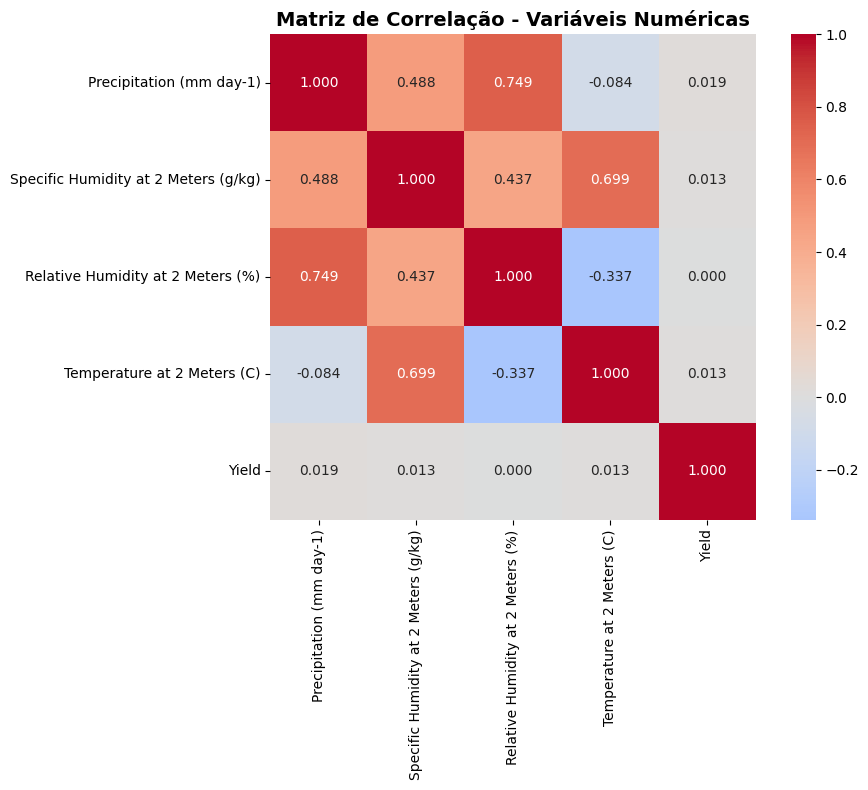

✅ Matriz de correlação criada com sucesso!


In [26]:
# =============================================================================
# MATRIZ DE CORRELAÇÃO - RELACIONAMENTOS ENTRE VARIÁVEIS
# =============================================================================

print("\n🔗 1. Criando matriz de correlação")

# Calcular matriz de correlação
correlation_matrix = df[numeric_vars].corr()

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar valores
            cmap='coolwarm',      # Esquema de cores
            center=0,             # Centralizar em 0
            square=True,         # Formato quadrado
            fmt='.3f')           # 3 casas decimais

plt.title('Matriz de Correlação - Variáveis Numéricas', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Matriz de correlação criada com sucesso!")


📈 2. Criando scatter plots


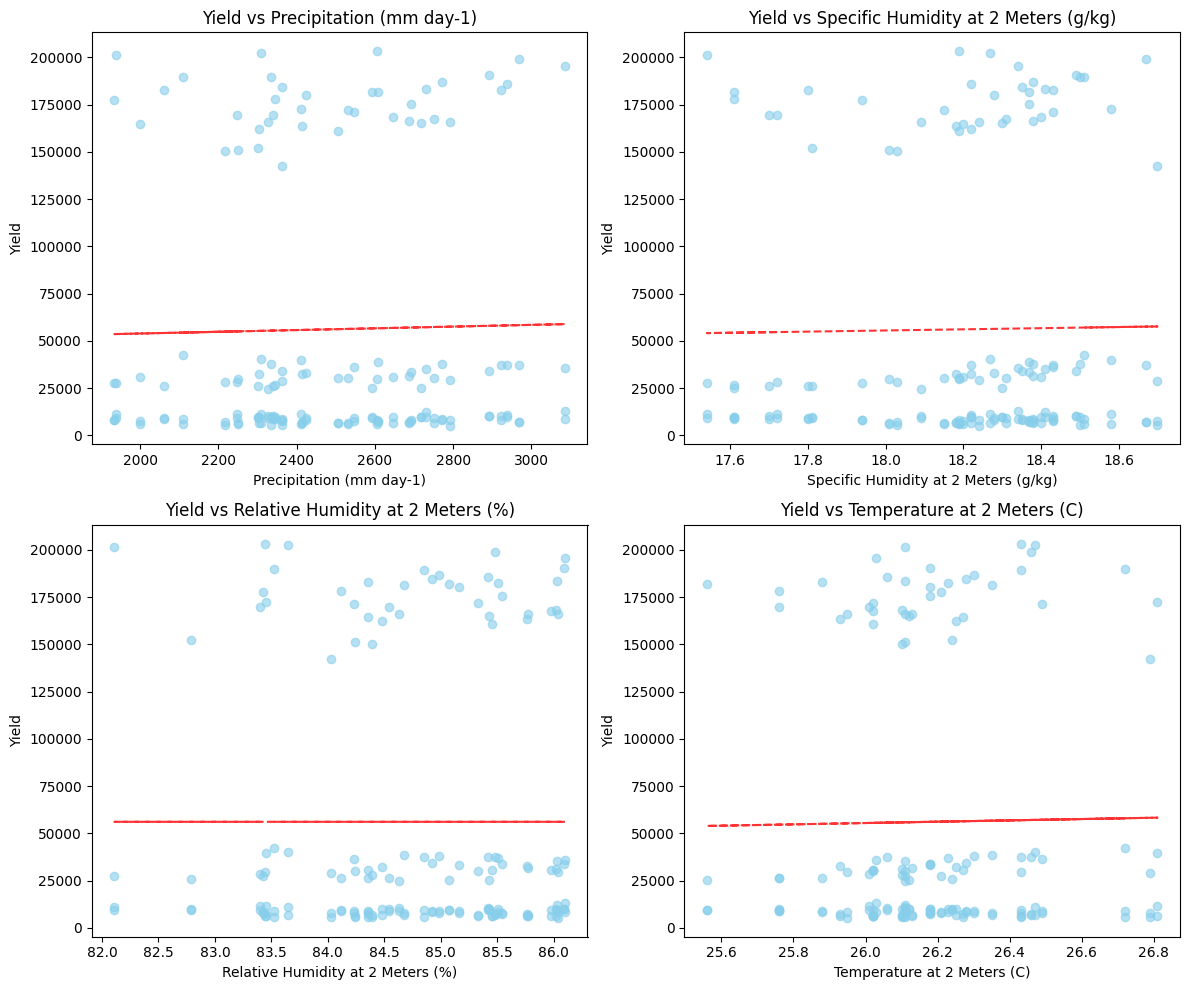

✅ Scatter plots criados com sucesso!


In [34]:
# =============================================================================
# SCATTER PLOTS - RELACIONAMENTOS VISUAIS
# =============================================================================

print("\n📈 2. Criando scatter plots")

# Criar scatter plots das variáveis com Yield
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Variáveis para plotar com Yield
yield_vars = [var for var in numeric_vars if var != 'Yield']

for i, var in enumerate(yield_vars):
    ax = axes[i]
    
    # Scatter plot
    ax.scatter(df[var], df['Yield'], alpha=0.6, color='skyblue')
    ax.set_xlabel(var)
    ax.set_ylabel('Yield')
    ax.set_title(f'Yield vs {var}')
    
    # Adicionar linha de tendência
    z = np.polyfit(df[var], df['Yield'], 1)
    p = np.poly1d(z)
    ax.plot(df[var], p(df[var]), "r--", alpha=0.8)


plt.tight_layout()
plt.show()


print("✅ Scatter plots criados com sucesso!")


🌾 3. Analisando padrões por cultura


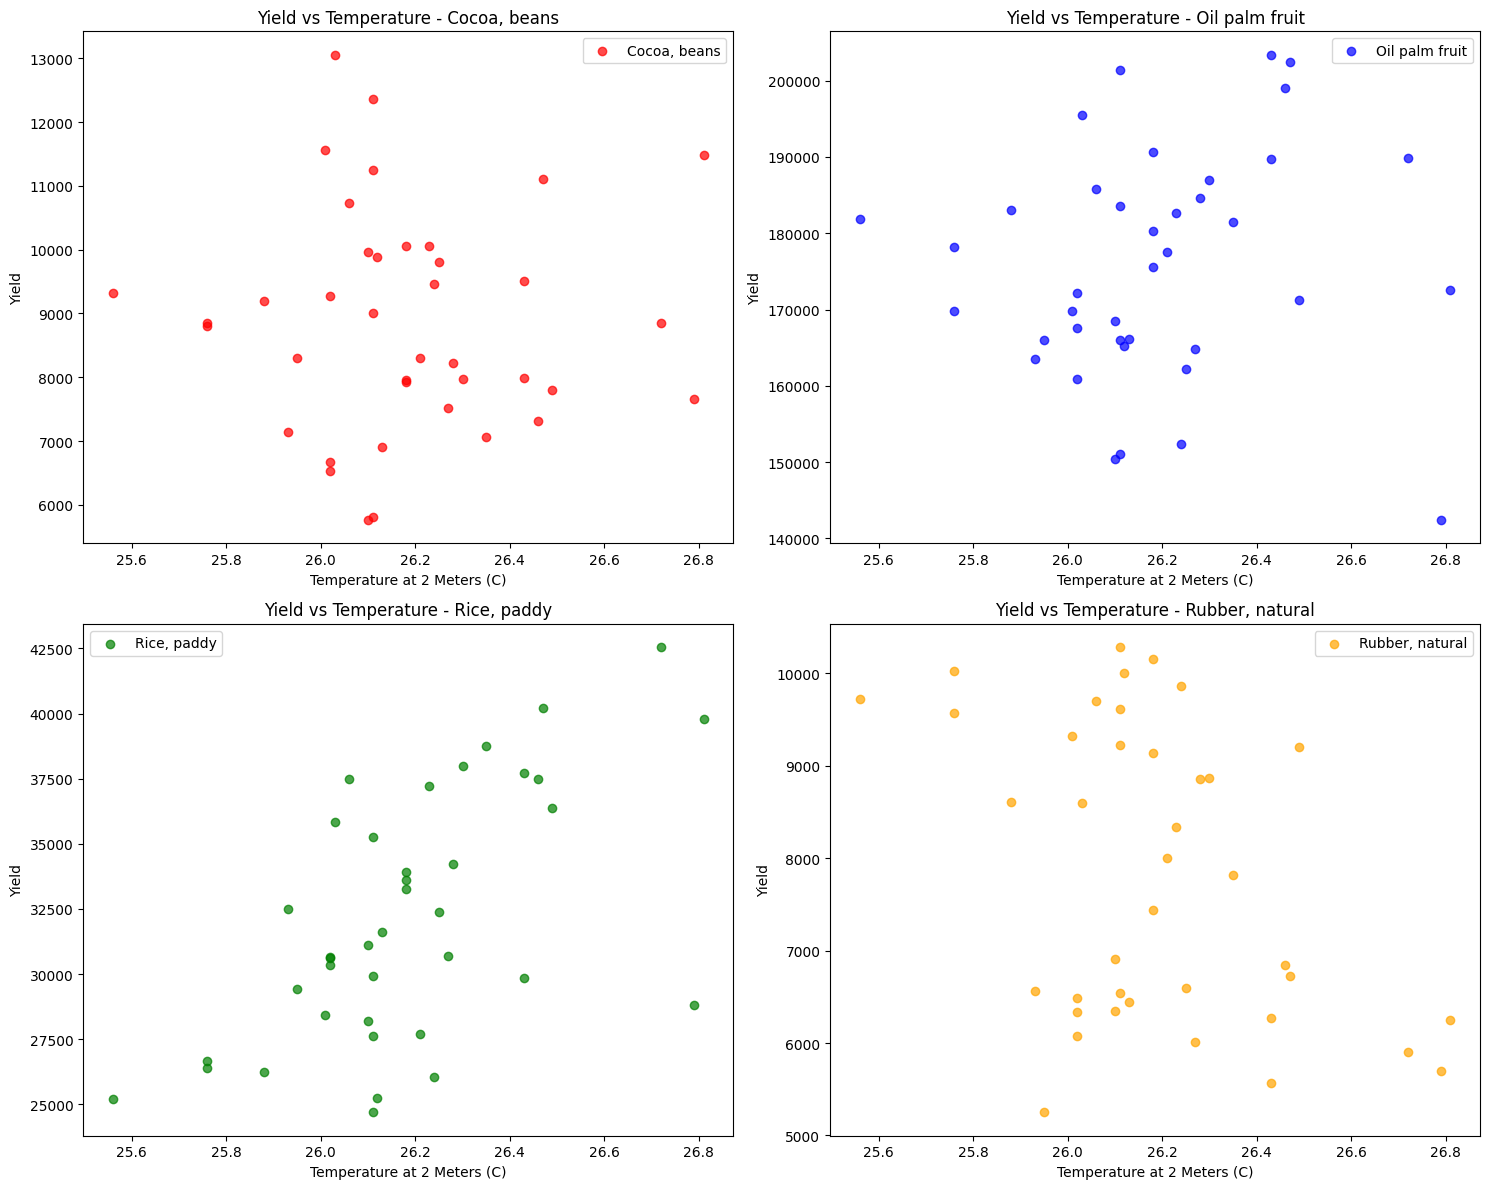

✅ Scatter plots por cultura criados!


In [36]:
# =============================================================================
# ANÁLISE POR CULTURA - PADRÕES ESPECÍFICOS
# =============================================================================

print("\n🌾 3. Analisando padrões por cultura")

# Criar scatter plots separados por cultura
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Cores para cada cultura
colors = ['red', 'blue', 'green', 'orange']
crops = df['Crop'].unique()

# Criar scatter plots para cada cultura
for i, crop in enumerate(crops):
    ax = axes[i]
    
    # Filtrar dados da cultura
    crop_data = df[df['Crop'] == crop]
    
    # Scatter plot: Temperature vs Yield
    ax.scatter(crop_data['Temperature at 2 Meters (C)'], 
               crop_data['Yield'], 
               alpha=0.7, 
               color=colors[i],
               label=crop)
    
    ax.set_xlabel('Temperature at 2 Meters (C)')
    ax.set_ylabel('Yield')
    ax.set_title(f'Yield vs Temperature - {crop}')
    ax.legend()

plt.tight_layout()
plt.show()

print("✅ Scatter plots por cultura criados!")

In [38]:
# =============================================================================
# CONCLUSÕES DA EDA BIVARIADA
# =============================================================================

print("\n" + "="*60)
print("�� CONCLUSÕES DA EDA BIVARIADA")
print("="*60)

print("🔗 CORRELAÇÕES ENTRE VARIÁVEIS:")
print("   ✅ Precipitation ↔ Relative Humidity: Correlação forte positiva (0.749)")
print("   ✅ Specific Humidity ↔ Temperature: Correlação forte positiva (0.699)")
print("   ⚠️ Temperature ↔ Relative Humidity: Correlação fraca negativa (-0.337)")

print("\n🎯 CORRELAÇÕES COM YIELD:")
print("   ❌ Todas as variáveis ambientais: Correlação muito fraca (~0.000)")
print("   ❌ Temperature: Não impacta Yield linearmente")
print("   ❌ Precipitation: Não impacta Yield linearmente")
print("   ❌ Humidity: Não impacta Yield linearmente")

print("\n🌾 ANÁLISE POR CULTURA:")
print("   ✅ Yield é determinado pelo tipo de cultura")
print("   ✅ Oil palm fruit: Yield muito superior (~175k)")
print("   ✅ Rice, paddy: Yield intermediário (~32k)")
print("   ✅ Cocoa/Rubber: Yield baixo (~8k)")

print("\n💡 INSIGHTS GERAIS:")
print("   → Variáveis ambientais têm correlações lógicas entre si")
print("   → Yield não se correlaciona com variáveis ambientais individuais")
print("   → Tipo de cultura é o principal determinante do Yield")

print("\n🎯 PRÓXIMOS PASSOS:")
print("   → **EDA Multivariada**: Interações entre variáveis, Padrões complexos por cultura")

print("✅ EDA Bivariada concluída!")


�� CONCLUSÕES DA EDA BIVARIADA
🔗 CORRELAÇÕES ENTRE VARIÁVEIS:
   ✅ Precipitation ↔ Relative Humidity: Correlação forte positiva (0.749)
   ✅ Specific Humidity ↔ Temperature: Correlação forte positiva (0.699)
   ⚠️ Temperature ↔ Relative Humidity: Correlação fraca negativa (-0.337)

🎯 CORRELAÇÕES COM YIELD:
   ❌ Todas as variáveis ambientais: Correlação muito fraca (~0.000)
   ❌ Temperature: Não impacta Yield linearmente
   ❌ Precipitation: Não impacta Yield linearmente
   ❌ Humidity: Não impacta Yield linearmente

🌾 ANÁLISE POR CULTURA:
   ✅ Yield é determinado pelo tipo de cultura
   ✅ Oil palm fruit: Yield muito superior (~175k)
   ✅ Rice, paddy: Yield intermediário (~32k)
   ✅ Cocoa/Rubber: Yield baixo (~8k)

💡 INSIGHTS GERAIS:
   → Variáveis ambientais têm correlações lógicas entre si
   → Yield não se correlaciona com variáveis ambientais individuais
   → Tipo de cultura é o principal determinante do Yield

🎯 PRÓXIMOS PASSOS:
   → **EDA Multivariada**: Interações entre variáveis,

### 3.3 Análise Multivariada

#### Objetivo
Analisar padrões complexos e interações entre múltiplas variáveis para identificar:
- **Interações** entre variáveis ambientais
- **Padrões complexos** por cultura
- **Combinações** de fatores que impactam Yield
- **Insights avançados** para modelagem preditiva

#### Variáveis Analisadas:
- **Combinações** de variáveis ambientais
- **Interações** com tipo de cultura
- **Padrões multidimensionais** no Yield
- **Análise de clusters** e grupos naturais


🔗 1. Analisando interações entre variáveis


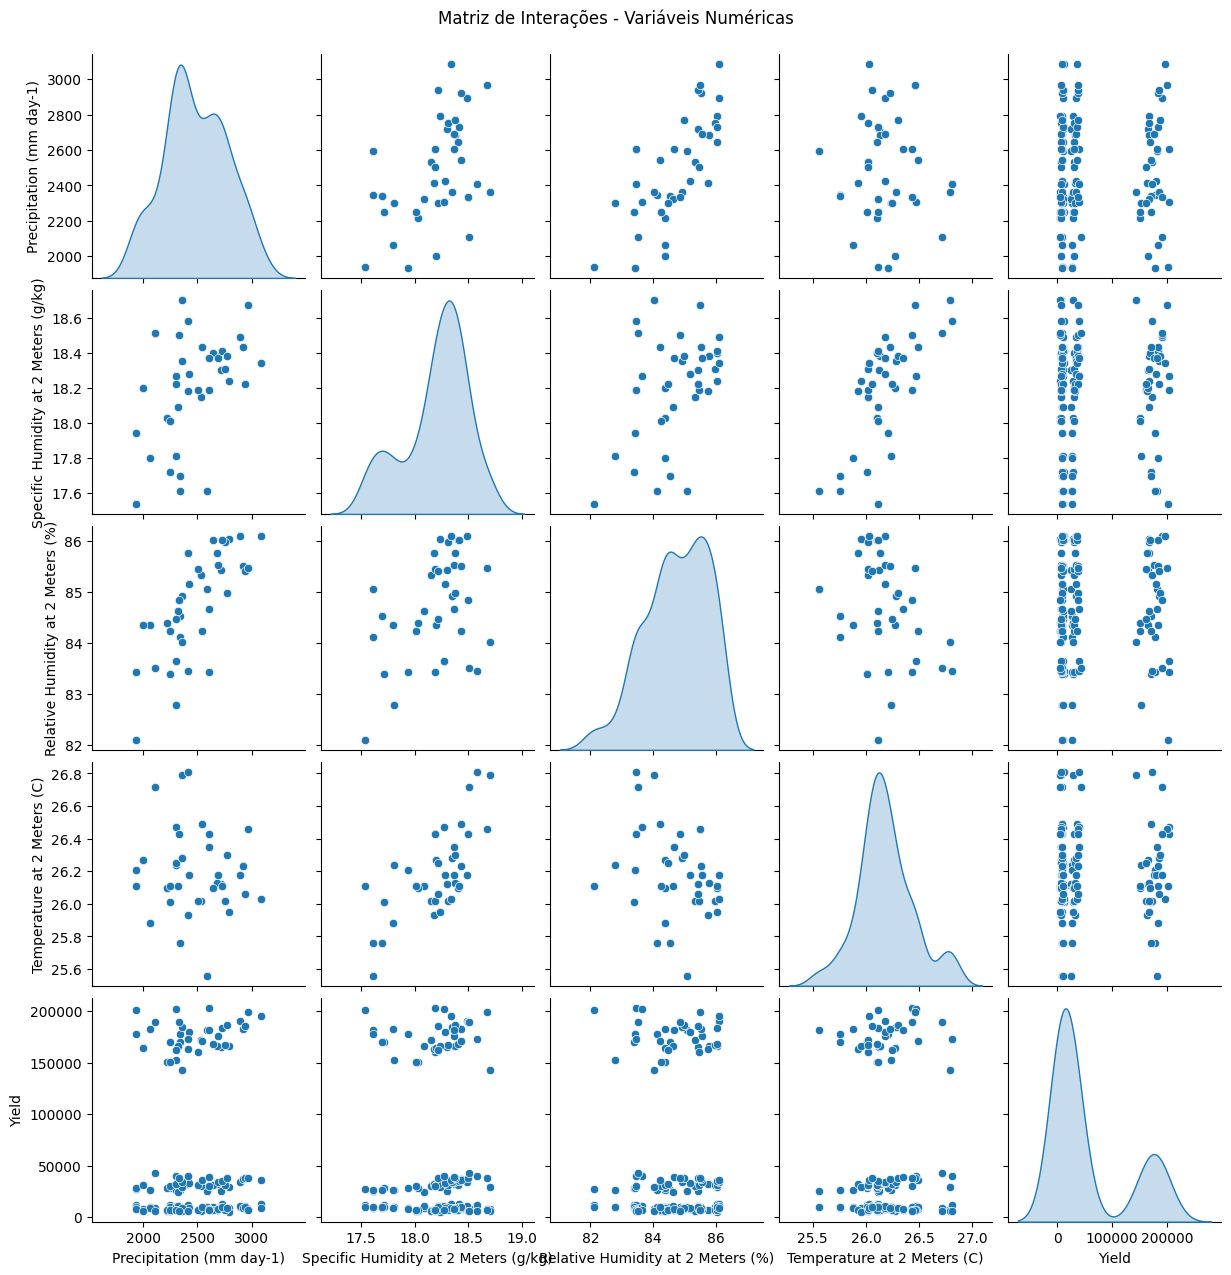

✅ Matriz de interações criada!


In [42]:
# =============================================================================
# ANÁLISE DE INTERAÇÕES ENTRE VARIÁVEIS
# =============================================================================

print("\n🔗 1. Analisando interações entre variáveis")

# Criar scatter matrix para visualizar todas as interações
fig = sns.pairplot(df[numeric_vars], diag_kind='kde')
fig.fig.suptitle('Matriz de Interações - Variáveis Numéricas', y=1.02)
plt.show()

print("✅ Matriz de interações criada!")


🌾 2. Análise multivariada por cultura


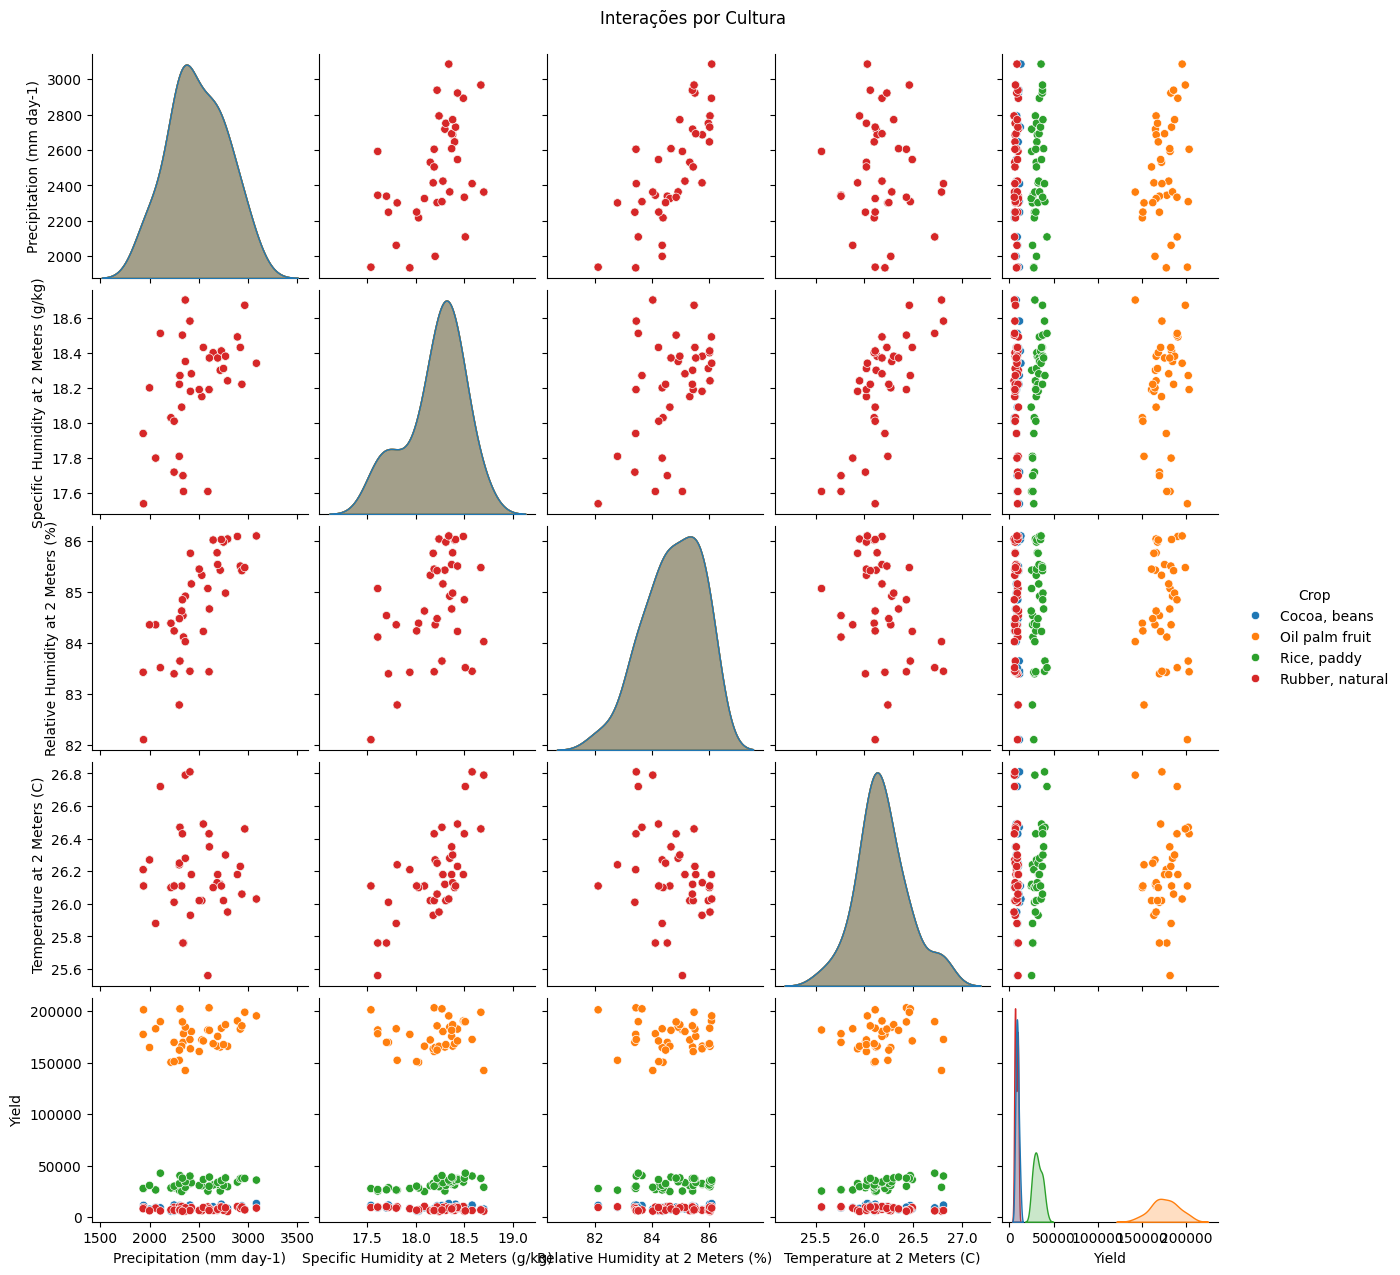

In [48]:
# =============================================================================
# ANÁLISE MULTIVARIADA POR CULTURA
# =============================================================================

print("\n🌾 2. Análise multivariada por cultura")

# Criar pairplot separado por cultura
fig = sns.pairplot(df, vars=numeric_vars, hue='Crop', diag_kind='kde')
fig.fig.suptitle('Interações por Cultura', y=1.02)
plt.show()

In [47]:
# =============================================================================
# CONCLUSÕES DA EDA MULTIVARIADA
# =============================================================================

print("\n" + "="*60)
print("📋 CONCLUSÕES DA EDA MULTIVARIADA")
print("="*60)

print("🔗 INTERAÇÕES ENTRE VARIÁVEIS:")
print("   ✅ Precipitation ↔ Relative Humidity: Correlação positiva forte")
print("   ✅ Specific Humidity ↔ Temperature: Correlação positiva moderada")
print("   ✅ Temperature ↔ Relative Humidity: Correlação negativa fraca")
print("   ✅ Todas as correlações são consistentes entre culturas")

print("\n📊 DETERMINANTES DO YIELD:")
print("   ✅ Cultura é o principal determinante do Yield")
print("   ✅ Condições ambientais são uniformes entre culturas")
print("   ✅ Yield específico por cultura (Oil palm > Rice > Cocoa/Rubber)")

print("\n💡 INSIGHTS PARA MODELAGEM:")
print("   → Variável 'Crop' será crucial para prever Yield")
print("   → Variáveis ambientais podem ter impacto limitado")
print("   → Interações entre variáveis podem ser importantes")
print("   → Modelo precisa considerar especificidades por cultura")

print("\n🎯 PRÓXIMOS PASSOS:")
print("   → **Preparação de Dados**: Limpeza, tratamento de outliers, feature engineering")

print("✅ EDA Multivariada concluída!")


📋 CONCLUSÕES DA EDA MULTIVARIADA
🔗 INTERAÇÕES ENTRE VARIÁVEIS:
   ✅ Precipitation ↔ Relative Humidity: Correlação positiva forte
   ✅ Specific Humidity ↔ Temperature: Correlação positiva moderada
   ✅ Temperature ↔ Relative Humidity: Correlação negativa fraca
   ✅ Todas as correlações são consistentes entre culturas

📊 DETERMINANTES DO YIELD:
   ✅ Cultura é o principal determinante do Yield
   ✅ Condições ambientais são uniformes entre culturas
   ✅ Yield específico por cultura (Oil palm > Rice > Cocoa/Rubber)

💡 INSIGHTS PARA MODELAGEM:
   → Variável 'Crop' será crucial para prever Yield
   → Variáveis ambientais podem ter impacto limitado
   → Interações entre variáveis podem ser importantes
   → Modelo precisa considerar especificidades por cultura

🎯 PRÓXIMOS PASSOS:
   → **Preparação de Dados**: Limpeza, tratamento de outliers, feature engineering
✅ EDA Multivariada concluída!


## 4. 📋 Conclusões Gerais da EDA

### Descobertas Quantitativas Críticas

**Distribuição do Rendimento por Cultura:**
- **Oil palm fruit**: Rendimento médio ~175k ton/ha (muito superior às demais)
- **Rice, paddy**: Rendimento médio ~32k ton/ha (intermediário)
- **Cocoa, beans e Rubber**: Rendimento médio ~8k ton/ha (baixo)
- **Diferença extrema**: Oil palm produz 22x mais que Cocoa/Rubber

**Características das Variáveis Ambientais:**
- **Precipitação**: 1934-3085 mm/dia (alta variabilidade, distribuição multimodal)
- **Temperatura**: 25.56-26.81°C (baixa variabilidade, clima equatorial estável)
- **Umidade**: Relativamente estável (82-86% umidade relativa)
- **Descoberta crítica**: Variáveis ambientais são **idênticas** para todas as culturas

### Insights Agrícolas Fundamentais

**Determinante Principal do Rendimento:**
A análise revela que o **tipo de cultura é o fator determinante** do rendimento, não as condições ambientais. Isso sugere que:
- As culturas têm **potencial produtivo intrínseco** muito diferente
- As condições climáticas da região são **adequadas para todas as culturas**
- A **escolha da cultura** é mais importante que otimizações ambientais

**Implicações para Agricultura de Precisão:**
- **Estratégia de cultivo**: Oil palm apresenta rendimento superior nas condições atuais
- **Limitação dos dados**: Condições ambientais uniformes impedem análise de otimização específica por cultura
- **Necessidade de mais dados**: Para determinar se Cocoa/Rubber teriam melhor rendimento em condições diferentes
- **Planejamento atual**: Focar em Oil palm pode ser mais eficaz nas condições climáticas da região

### Descobertas Metodológicas

**Qualidade dos Dados:**
- **Dados completos**: 0 valores faltantes, 0 duplicatas
- **Distribuição equilibrada**: 25% de cada cultura (39 registros cada)
- **Tipos adequados**: Variáveis numéricas para análises estatísticas

**Padrões de Correlação:**
- **Correlações ambientais lógicas**: Precipitação ↔ Umidade (0.749), Temperatura ↔ Umidade específica (0.699), Temperatura ↔ Umidade Relativa (-0.337)
- **Ausência de correlação linear**: Variáveis ambientais não correlacionam com Yield
- **Necessidade de análises não-lineares**: Relacionamentos podem ser complexos

### Hipóteses Formuladas para Próximas Etapas

**H1**: O tipo de cultura será o principal preditor do rendimento, com Oil palm fruit apresentando rendimentos significativamente superiores.

**H2**: Variáveis ambientais terão impacto limitado na modelagem devido à baixa variabilidade e ausência de correlação linear.

**H3**: Análises de clustering revelarão grupos distintos baseados no tipo de cultura, não em condições ambientais.

**H4**: Modelos não-lineares (Random Forest, XGBoost) serão mais eficazes que modelos lineares devido às relações complexas.

### Justificativa dos Próximos Passos

**Preparação de Dados:**
- **Feature Engineering**: Criar interações entre variáveis ambientais para capturar relações não-lineares
- **Encoding**: One-hot encoding para variável 'Crop' (crucial para modelagem)
- **Normalização**: Necessária para algoritmos sensíveis à escala

**Análise de Clustering:**
- **Validação da H3**: Confirmar se clusters são baseados em cultura ou condições ambientais
- **Detecção de outliers**: Identificar condições climáticas excepcionais
- **Segmentação**: Criar grupos para análise de tendências de produtividade

**Modelagem Preditiva:**
- **5 algoritmos distintos**: Testar diferentes abordagens (Linear, Tree-based, Ensemble, Neural)
- **Validação cruzada**: Garantir robustez dos modelos
- **Métricas específicas**: R², RMSE, MAE para avaliação de regressão

**Avaliação e Interpretação:**
- **Análise de resíduos**: Verificar suposições dos modelos
- **Feature importance**: Identificar variáveis mais impactantes
- **Interpretabilidade**: Explicar decisões para stakeholders agrícolas